In [ ]:

import pandas as pd

# Load the uploaded CSVs
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

# Display top rows
print("📊 Trader Data:")
print(trader_df.head())

print("\n🧠 Fear & Greed Index:")
print(sentiment_df.head())


📊 Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash  \
0         0.0  0xec09

In [ ]:
# Convert date in sentiment_df to datetime format
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], format='%d-%m-%Y')

# Simplify classification: map 'Extreme Fear' and 'Fear' → 'Fear'; 'Greed' and 'Extreme Greed' → 'Greed'
sentiment_df['classification'] = sentiment_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

# Convert trader timestamp to datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Create a date-only column for joining
trader_df['date'] = trader_df['Timestamp IST'].dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date

# Merge both datasets on date
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Check the result
print(merged_df[['Timestamp IST', 'Side', 'Size USD', 'Closed PnL', 'classification']].head())


        Timestamp IST Side  Size USD  Closed PnL classification
0 2024-12-02 22:50:00  BUY   7872.16         0.0          Greed
1 2024-12-02 22:50:00  BUY    127.68         0.0          Greed
2 2024-12-02 22:50:00  BUY   1150.63         0.0          Greed
3 2024-12-02 22:50:00  BUY   1142.04         0.0          Greed
4 2024-12-02 22:50:00  BUY     69.75         0.0          Greed


/tmp/ipython-input-4-2058128376.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Size USD', data=volume_by_sentiment, palette='viridis')


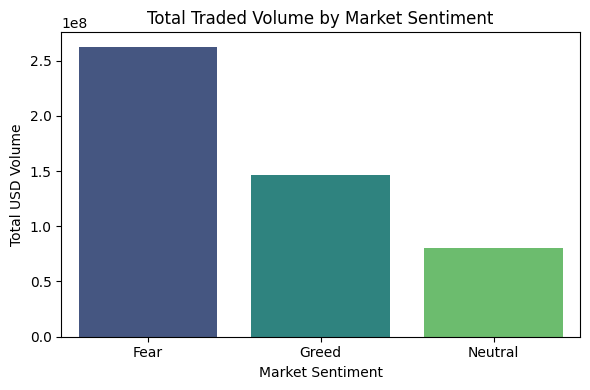

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by sentiment and calculate total traded volume (USD)
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].sum().reset_index()

# Plotting
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='Size USD', data=volume_by_sentiment, palette='viridis')
plt.title('Total Traded Volume by Market Sentiment')
plt.ylabel('Total USD Volume')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.savefig('volume_by_sentiment.png')  # Save to outputs/
plt.show()


  classification           sum        mean
0           Fear  1.891969e+06  206.524274
1          Greed  7.500782e+05  118.458333
2        Neutral  5.558337e+05  178.839679


/tmp/ipython-input-5-4233174851.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='mean', data=pnl_by_sentiment, palette='coolwarm')


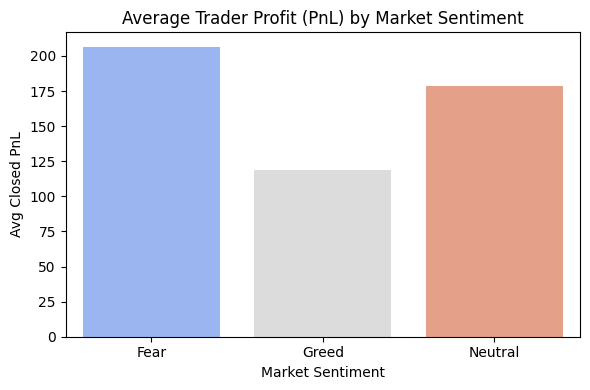

In [ ]:
# Group by sentiment and calculate average and total Closed PnL
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].agg(['sum', 'mean']).reset_index()

print(pnl_by_sentiment)

# Plot average PnL
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='mean', data=pnl_by_sentiment, palette='coolwarm')
plt.title('Average Trader Profit (PnL) by Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.savefig('avg_pnl_by_sentiment.png')  # Save to outputs/
plt.show()


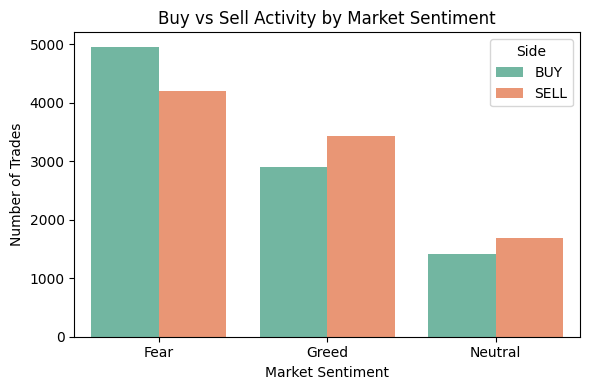

In [ ]:
# Group by sentiment and trading side
side_sentiment = merged_df.groupby(['classification', 'Side']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='count', hue='Side', data=side_sentiment, palette='Set2')
plt.title('Buy vs Sell Activity by Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.savefig('side_by_sentiment.png')  # Save to outputs/
plt.show()


In [ ]:
# Save merged dataset
merged_df.to_csv('merged_trader_sentiment.csv', index=False)
